# Finding the node hierarchies and covers of an anatomical neural network
In this example, we use ELK to find the community and hierarchical structure of retrograde tract-tracing network of the macaque monkey which contains the information of the number of neurons connecting an area from the macaque brain to each of the 29 injected areas. This network is very complex because it is dense, directed, and the weights are heterogeneous, covering several orders of magnitude.

In [1]:
T = True
F = False
# Personal libs ---- 
from modules.main import ELK
from modules.hierarentropy import Hierarchical_Entropy
from plotting_jupyter.plotting_H import Plot_H
from plotting_jupyter.plotting_N import Plot_N
from modules.colregion import colregion
from networks.mac29 import MAC29
from various.network_tools import *

In [2]:

# Declare global variables ----
linkage = "single"
lookup = F
cut = F
mode = "ZERO"
topology = "MIX"
index  = "H2"

# Load structure ----
NET = MAC29()

/var/folders/qk/02c8jsfd5dd9zjj2qvs2gwsw0000gn/T/ipykernel_12020/2502246650.py:2: RuntimeWarning: divide by zero encountered in log
  plot_n.histogramX(np.log(NET.A), width=6, height=5, labelx=r"$\log(FLNe)$")
/var/folders/qk/02c8jsfd5dd9zjj2qvs2gwsw0000gn/T/ipykernel_12020/2502246650.py:4: RuntimeWarning: divide by zero encountered in log
  NET.D[:, :NET.nodes], np.log(NET.A), s=10, labelx="distance [mm]", labely=r"$log(FLNe)$",
/usr/local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


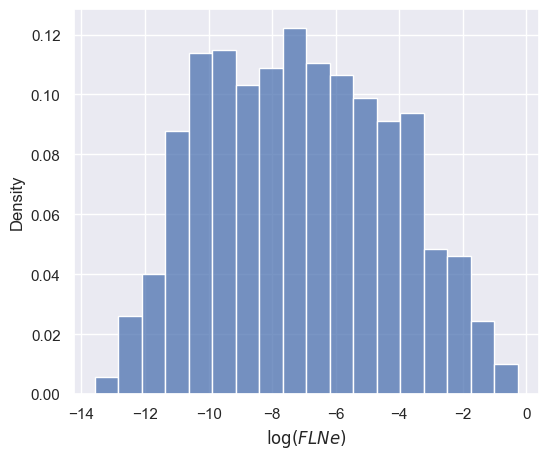

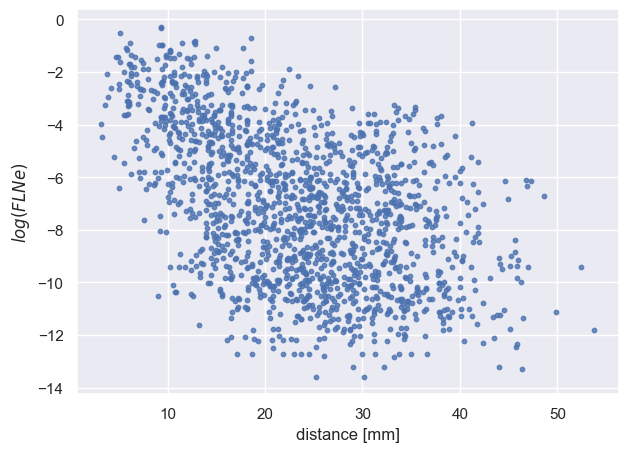

In [3]:
plot_n = Plot_N()
plot_n.histogramX(np.log(NET.A), width=6, height=5, labelx=r"$\log(FLNe)$")
plot_n.regXY(
    NET.D[:, :NET.nodes], np.log(NET.A), s=10, labelx="distance [mm]", labely=r"$log(FLNe)$",
    width=7, height=5
)

In [4]:
## Hierarchy object!! ----
H = ELK(
    NET.C, NET.nodes, linkage, mode,
    topology=topology,
    index=index,
    lookup=lookup
)
H.compute_H_features_cpp()
H.link_entropy_cpp("short", cut=cut)
H.la_abre_a_merde_cpp()
H.node_entropy_cpp("short", cut=cut)
H.set_entropy([
  H.node_entropy, H.node_entropy_H,
  H.link_entropy, H.link_entropy_H
])
# Set labels to network ----
L = colregion(NET)
L.get_regions((T, NET.regions))
H.set_colregion(L)

Compute link hierarchical agglomeration ----
	> Compute features
Starting Z2dict

	link entropy :  Sh : 0.4114, and Sv : 0.5886


	link entropy H: Sh : 0.4016, and Sv : 0.5984

	> Compute the node hierarchy ----
25%
Level information
Vertex entropy
Vertex entropy H
Level entropy
Level entropy H
Number of vertices in the tree: 1071
Commencer: la abre a merde
50%
75%
Voila, bon ami

	Node entropy :  Sh : 0.2390, and Sv : 0.7610


	Node entropy H: Sh : 0.2091, and Sv : 0.7909

Starting Z2dict
Level information
Vertex entropy
Vertex entropy H
Level entropy
Level entropy H
Number of vertices in the tree: 57


	> Visualize Hierarchical Entropy by levels!!!
Levels node hierarchy: 13
Levels link hierarchy: 38
            S dir                 c  level
33   0.051547   H  node_hierarchy_H      6
46   0.151363   V  node_hierarchy_H      6
4    0.051063   H    node_hierarchy      9
16   0.088875   V    node_hierarchy     10
149  0.033547   H  link_hierarchy_H     17
187  0.037390   V  link_hierarchy_H     17
72   0.026775   H    link_hierarchy     18
109  0.027376   V    link_hierarchy     19
	> Plot D as a function of K
	> Plot loop entropy as a function of K


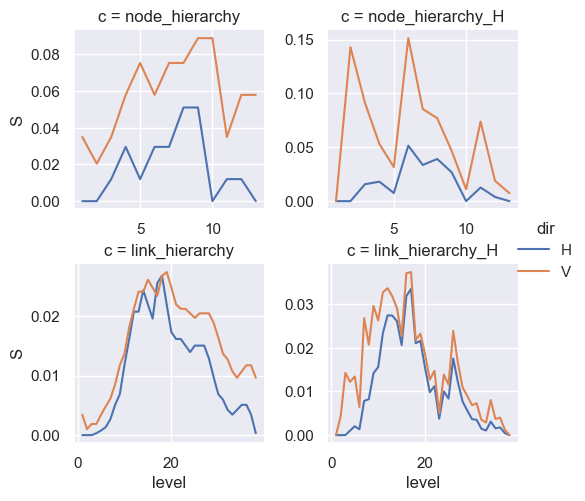

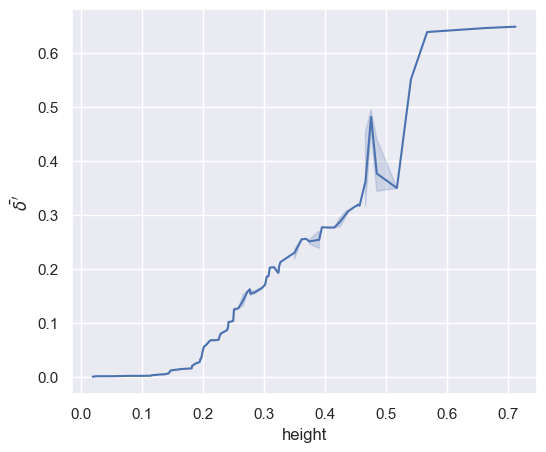

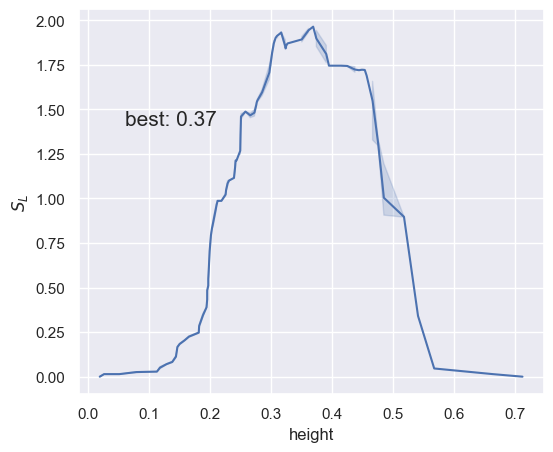

In [5]:
plot_h = Plot_H(H)
plot_h.plot_Hierarchical_Entropy(width=6, height=5)
plot_h.plotD(width=6, height=5)
plot_h.plotSL(width=6, height=5)

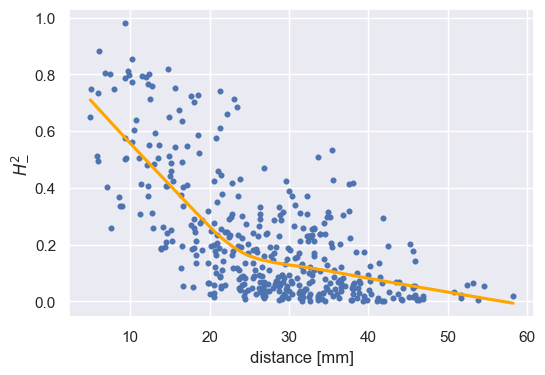

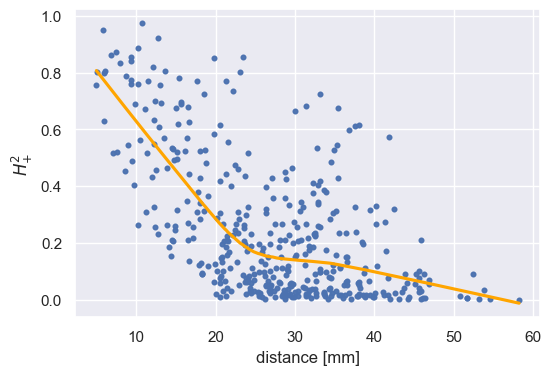

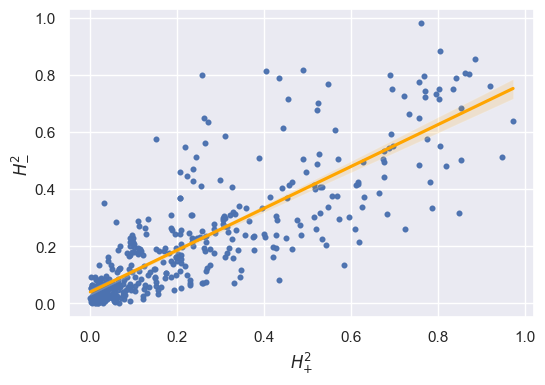

In [6]:

plot_n.regXY(
    NET.D[:NET.nodes, :NET.nodes], H.target_sim_matrix,
    s=10, lowess=T, width=6, height=4,
    labelx="distance [mm]", labely=r"$H^{2}_{-}$"
)
plot_n.regXY(
    NET.D[:NET.nodes, :NET.nodes], H.source_sim_matrix,
    s=10, lowess=T, width=6, height=4,
    labelx="distance [mm]", labely=r"$H^{2}_{+}$"
)
plot_n.regXY(
    H.source_sim_matrix, H.target_sim_matrix,
    s=10, width=6, height=4,
    labelx=r"$H^{2}_{+}$", labely=r"$H^{2}_{-}$"
)

Find node partition using _SL
Best K: 43
Best R: 8	 Score: _SL
{'7a': [1, 2, 4], '7b': [2, 3], '7m': [2, 4]}


/var/folders/qk/02c8jsfd5dd9zjj2qvs2gwsw0000gn/T/ipykernel_12020/1539298268.py:11: RuntimeWarning: divide by zero encountered in log
  k, -1 / np.log(NET.A[:NET.nodes, :]), rlabels2,


Visualize nodal dendrogram!!!


/var/folders/qk/02c8jsfd5dd9zjj2qvs2gwsw0000gn/T/ipykernel_12020/1539298268.py:15: RuntimeWarning: divide by zero encountered in log
  plot_h.heatmap_dendro(r, np.log(NET.A[:NET.nodes, :]), font_size=8, width=8, height=6)


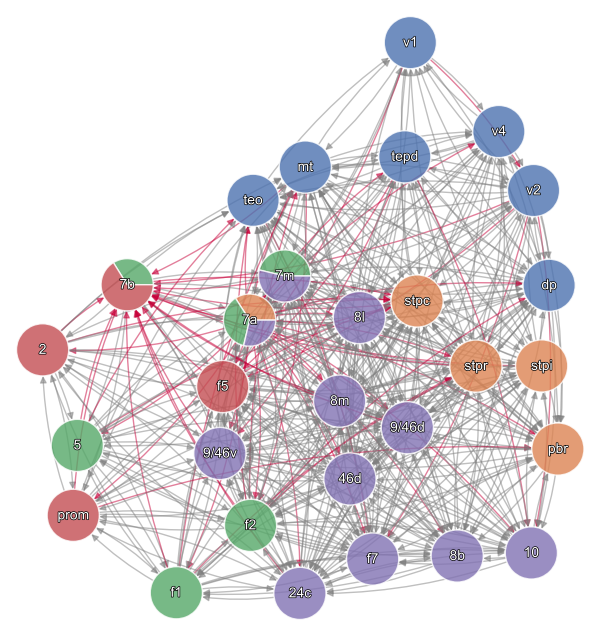

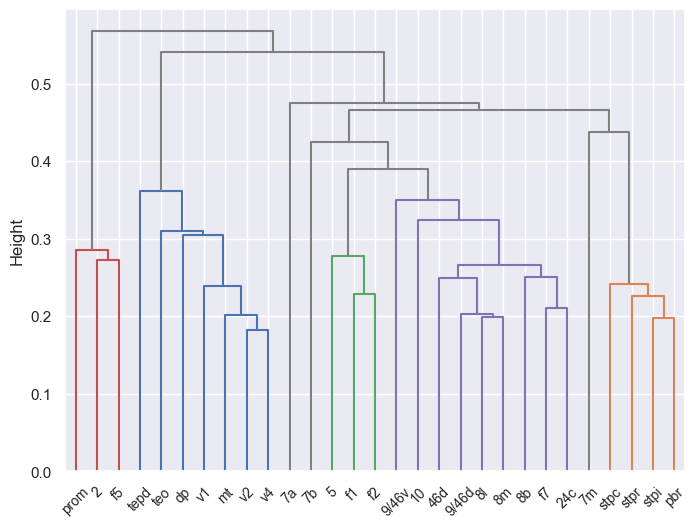

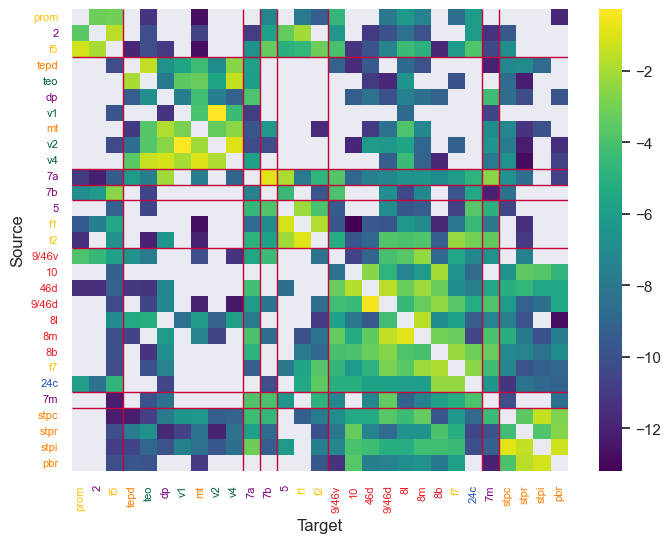

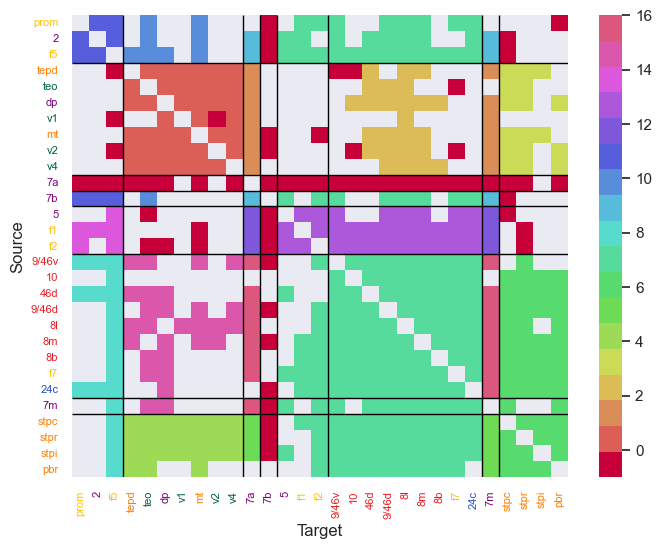

In [7]:
SCORE = "_SL"
k, r = get_best_kr_equivalence(SCORE, H)
print(f"Find node partition using {SCORE}")
print("Best K: {}\nBest R: {}\t Score: {}".format(k, r, SCORE))
rlabels = get_labels_from_Z(H.Z, r)
rlabels = skim_partition(rlabels)
# Overlap ----
overlap, nocs_covers, nocs_sizes, rlabels2  = H.discovery(rlabels, k, direction="both", index=index)
print(nocs_covers)
plot_h.plot_network_combined(
  k, -1 / np.log(NET.A[:NET.nodes, :]), rlabels2,
  nocs_covers, nocs_sizes, cmap_name="deep", font_size=10
)
plot_h.nodal_dendrogram(r, width=8, height=6, cmap_name="deep") #
plot_h.heatmap_dendro(r, np.log(NET.A[:NET.nodes, :]), font_size=8, width=8, height=6)
plot_h.lcmap_dendro(r, k, font_size=8, width=8, height=6)

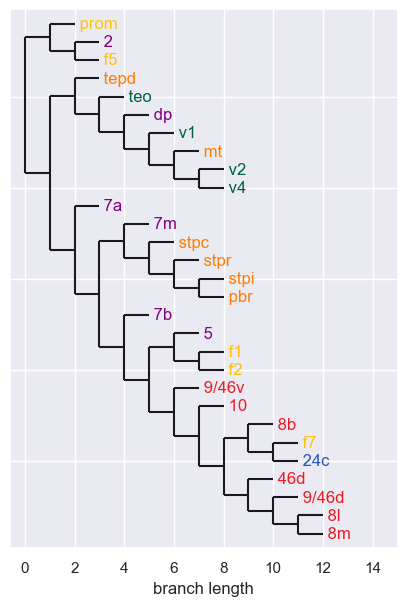

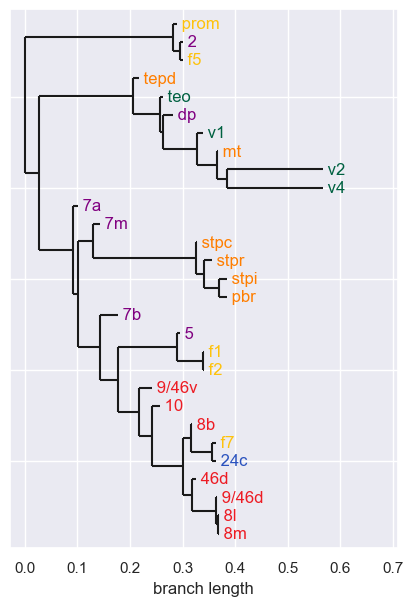

In [8]:
S = Hierarchical_Entropy(H.Z, H.nodes, H.colregion.labels[:H.nodes])
S.Z2dict("short")
tree = S.zdict2newick(S.tree, weighted=F)
treeh = S.zdict2newick(S.tree, weighted=T)
plot_h.plot_newick(tree, width=5, height=7)
plot_h.plot_newick(treeh, width=5, height=7)